In [1]:
from data import UnlabledtrainpredViT
from torch.utils.data import DataLoader
import torch
import os
import time
from torch import nn
from torch.optim import Adam
from model import Predictor


ImportError: cannot import name 'UnlabledtrainpredSViT' from 'data' (/Users/brettb/Desktop/Deep_Learning/Final Project/Video-Instance-Segmentation-with-SSL/VIT_Pred/data.py)

In [ ]:
dataset = UnlabledtrainpredSViT(root = '../small_dataset/unlabeled/')
resnet = models.resnet50()
resnet

In [4]:
dataset[0][1].shape

torch.Size([3, 160, 240])

In [42]:
batch_size = 2
dataloader = DataLoader(
        dataset, 
        batch_size=batch_size,
        shuffle=True)
shape_in = (11, 3, 160, 240)

In [32]:
x, target = next(iter(dataloader))


In [20]:
output = model(x)

In [21]:
output.shape

torch.Size([2, 11, 3, 160, 240])

In [26]:
criterion = nn.MSELoss()
loss = criterion(x, target)

In [34]:
import matplotlib.pyplot as plt
import random
sample_imgs, sample_target = dataset[random.randint(0, len(dataset)-1)]
x = sample_imgs.to(device)
x = x.unsqueeze(0) #add batch dim
output = model(x)
output = output.detach().cpu().squeeze(0)

#unbind sequence dim
sample_imgs_unstack = torch.unbind(sample_imgs, dim=0)
sample_target_unstack = torch.unbind(sample_target, dim=0)
output = torch.unbind(output, dim=0)
def visualize(sample_imgs_unstack, target_imgs_unstack, output_img, outpath = None):
    #visualize 11 sample images in the first row, 11 target images in the second row, and the 11 outputs of the model in the third row
    fig, axs = plt.subplots(3, 11, figsize=(20, 10))
    for i in range(11):
        axs[0, i].imshow(sample_imgs_unstack[i].permute(1, 2, 0))
        axs[1, i].imshow(target_imgs_unstack[i].permute(1, 2, 0))
        axs[2, i].imshow(output_img[i].permute(1, 2, 0))
        axs[0, i].set_title(f"input:{i}")
        axs[1, i].set_title(f"target:{i}")
        axs[2, i].set_title(f"output:{i}")
        axs[0, i].axis('off')
        axs[1, i].axis('off')
        axs[2, i].axis('off')
    plt.tight_layout()
    plt.show()

In [48]:
output[0][0]

tensor([[-0.2291, -0.0773, -0.3023,  ..., -0.2713, -0.0581,  0.0569],
        [-0.0123, -0.2019,  0.2202,  ..., -0.0614, -0.2915, -0.0820],
        [-0.1489, -0.0403, -0.2424,  ...,  0.0337, -0.2207,  0.0746],
        ...,
        [-0.1962, -0.1476, -0.2641,  ...,  0.0512,  0.0241,  0.0048],
        [-0.0365,  0.0481,  0.2294,  ...,  0.1896, -0.0737,  0.0707],
        [ 0.1679,  0.1283,  0.2199,  ...,  0.2078,  0.3422,  0.1262]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

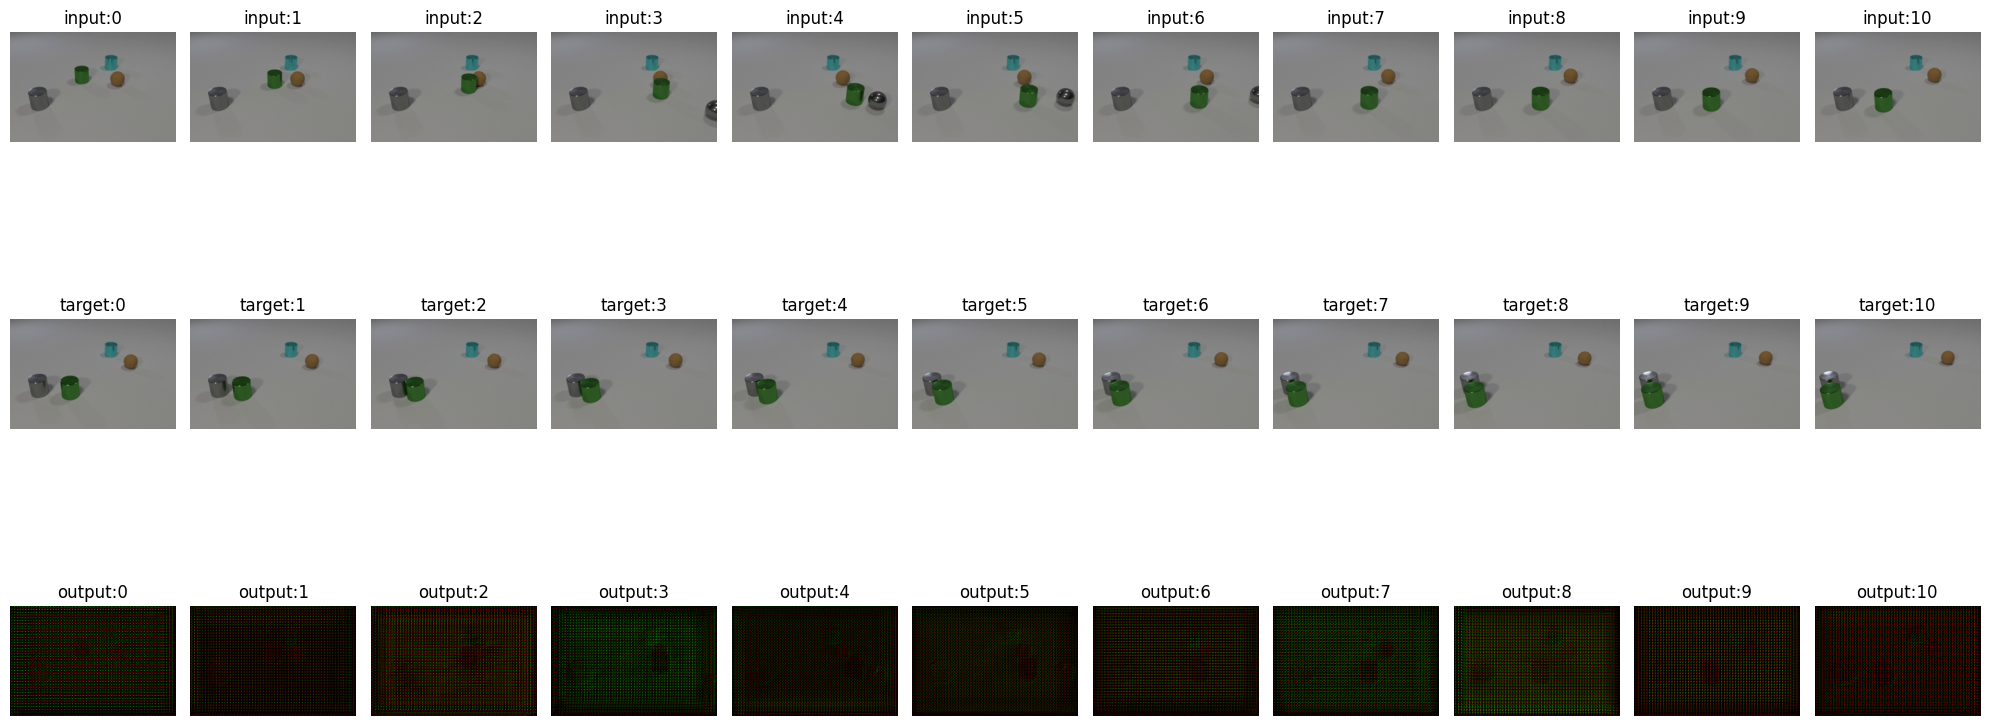

In [41]:
visualize(sample_imgs_unstack, sample_target_unstack, output)

In [40]:
cnt = 0
for param in model.parameters():
    cnt +=1
print(cnt)

322


In [7]:
for x, target in dataloader:
    pass

In [6]:
target.shape

torch.Size([16, 11, 3, 160, 240])